In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn import metrics


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression



import warnings
warnings.filterwarnings('ignore')

train= pd.read_csv(r'C:\Users\Varun\Desktop\Project\Dataset\Bigmart\Train.csv')
test=  pd.read_csv(r'C:\Users\Varun\Desktop\Project\Dataset\Bigmart\Test.csv')

# Inspecting the Dataset

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [3]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
train.head(25)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Number of null

In [7]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Visualizing various attributes

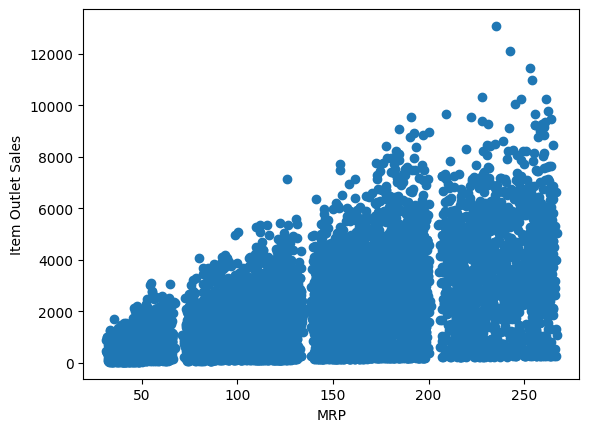

In [9]:
import matplotlib.pyplot as plt

plt.scatter(train.Item_MRP, train.Item_Outlet_Sales,)

plt.xlabel("MRP")
plt.ylabel("Item Outlet Sales")

plt.show()

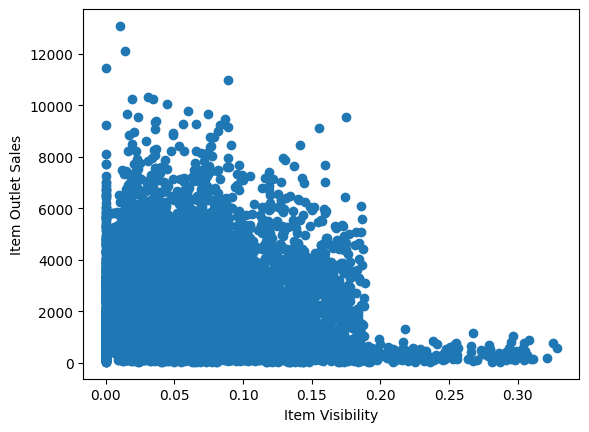

In [10]:
import matplotlib.pyplot as plt

plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales,)

plt.xlabel("Item Visibility")
plt.ylabel("Item Outlet Sales")

plt.show()

In [11]:
#Item Visibility cant be Zero
train.Item_Visibility.value_counts().head()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
Name: count, dtype: int64

### Above the Item Visibility cannot be zero
***

In [12]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

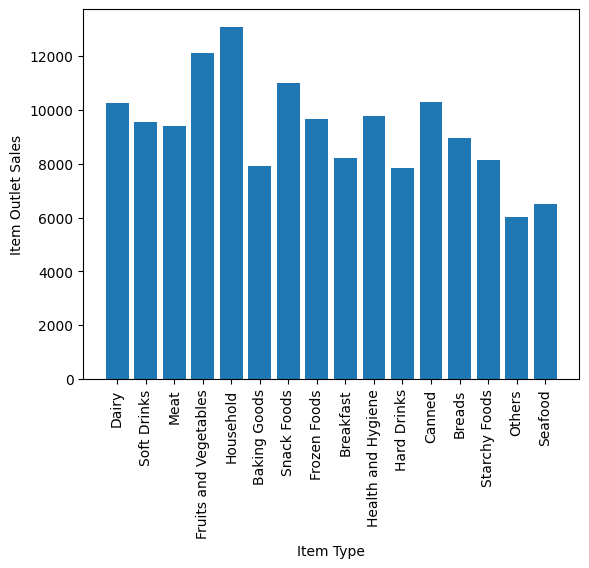

In [13]:
import matplotlib.pyplot as plt

plt.bar(train.Item_Type, train.Item_Outlet_Sales,)

plt.xlabel("Item Type")
plt.ylabel("Item Outlet Sales")

plt.xticks(rotation=90)

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

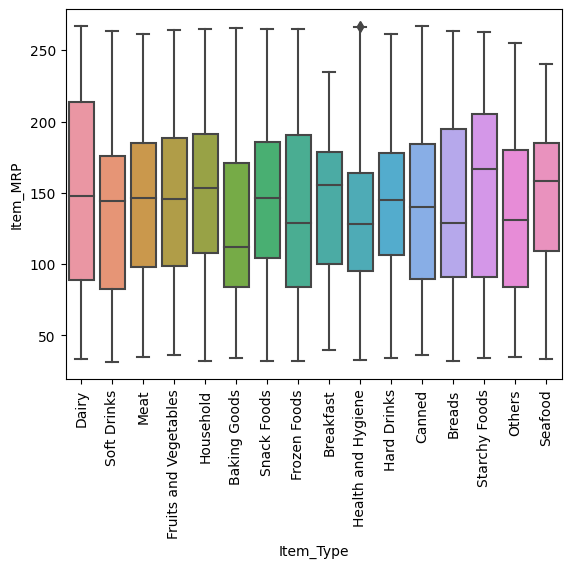

In [14]:
#Checking Outliers in graph

import seaborn as sns

sns.boxplot(x = train['Item_Type'],
            y = train['Item_MRP'])
plt.xticks(rotation=90)

### Outlier found in Health and Hygiene
***

In [15]:
#some corrections has to be done

train.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

### Some correction has to be done
***

In [16]:
train.Item_Weight.value_counts().head()

Item_Weight
12.15    86
17.60    82
13.65    77
11.80    76
15.10    68
Name: count, dtype: int64

In [17]:
#these null should be dropped
train.Item_Weight.isnull().sum()

1463

### There are null in Item Weight these should be dropped or imputed
***

In [18]:
train.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [19]:
#some amount of null maybe reduced
train.Outlet_Size.isnull().sum()

2410

### There are null in Outlet Size too these should be dropped or imputed
******

In [20]:
train.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [21]:
train.Item_Type.isnull().sum()

0

In [22]:
train.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [23]:
print(min(train.Outlet_Establishment_Year.unique()))

1985


In [24]:
print(max(train.Outlet_Establishment_Year.unique()))

2009


***
# Based on the observation the following has to be done for Data Cleaning

-  Outliers there for Health and Hygiene
-  Some corrections has to be done in Fat_content
-  Item Visibility cant be Zero
-  These null should be dropped in Item_weight
-  Some amount of null maybe reduced in Outlet Size
-  The Age section needed to be added and the Establishment Year should be remeved


## Making Age column

In [25]:
train['Age']=2015-train.Outlet_Establishment_Year
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,16
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,6
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,16
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,17
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,28
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,13
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,11
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,6


In [26]:
train.Age.unique()

array([16,  6, 17, 28, 30, 13,  8, 18, 11], dtype=int64)

### Grouping Data of 3

In [27]:
for i in range (len(train.Age)):
    if train.Age[i]<=10:
        train.Age[i]=10
    elif train.Age[i]<=20:
        train.Age[i]=20
    elif train.Age[i]<=30:
        train.Age[i]=30
        

train.Age.unique()

array([20, 10, 30], dtype=int64)

### Dropping Establish year column

In [28]:
train.drop(['Outlet_Establishment_Year'], axis=1,inplace=True)
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,20
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,10
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,20
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,20
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,30
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,30
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,NaN,Tier 2,Supermarket Type1,549.2850,20
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,20
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,10


## Reducing null in Outlet_size

In [29]:
#reducing null in outlet size
print(train.Outlet_Size.unique())
print(train.Outlet_Location_Type.unique())
print(train[['Outlet_Size','Outlet_Location_Type']])

crosstable = pd.crosstab(train['Outlet_Size'],train['Outlet_Location_Type'])
crosstable

['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
     Outlet_Size Outlet_Location_Type
0         Medium               Tier 1
1         Medium               Tier 3
2         Medium               Tier 1
3            NaN               Tier 3
4           High               Tier 3
...          ...                  ...
8518        High               Tier 3
8519         NaN               Tier 2
8520       Small               Tier 2
8521      Medium               Tier 3
8522       Small               Tier 1

[8523 rows x 2 columns]


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


### Here all Tier 2 are small

In [30]:
count=0

for i in range (0,(len(train)-1)):
    if (train.loc[i,'Outlet_Location_Type']=='Tier 2' and pd.isna(train.loc[i,'Outlet_Size'])):
        train.loc[i,'Outlet_Size']="Small"
        count+=1
    else:
        pass
print(count)

1855


In [31]:
train.Outlet_Size.value_counts()
crosstable = pd.crosstab(train['Outlet_Size'],train['Outlet_Location_Type'])
crosstable

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,2785,0


***********

In [32]:
print(train.Outlet_Type.unique())
print(train.Outlet_Size.unique())
print(train[['Outlet_Size','Outlet_Type']])

crosstable = pd.crosstab(train['Outlet_Size'],train['Outlet_Type'])
crosstable

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
['Medium' nan 'High' 'Small']
     Outlet_Size        Outlet_Type
0         Medium  Supermarket Type1
1         Medium  Supermarket Type2
2         Medium  Supermarket Type1
3            NaN      Grocery Store
4           High  Supermarket Type1
...          ...                ...
8518        High  Supermarket Type1
8519       Small  Supermarket Type1
8520       Small  Supermarket Type1
8521      Medium  Supermarket Type2
8522       Small  Supermarket Type1

[8523 rows x 2 columns]


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,3715,0,0


### Here all Grocery Store are small

In [33]:

for i in range (0,(len(train)-1)):
    if (train.loc[i,'Outlet_Type']=='Grocery Store'):
        train.loc[i,'Outlet_Size']="Small"
    else:
        pass


In [34]:
for i in range (0,(len(train)-1)):
    if (train.loc[i,'Outlet_Type']=='Supermarket Type2'):
        train.loc[i,'Outlet_Size']="Medium"
    else:
        pass


In [35]:
for i in range (0,(len(train)-1)):
    if (train.loc[i,'Outlet_Type']=='Supermarket Type3'):
        train.loc[i,'Outlet_Size']="Medium"
    else:
        pass


In [36]:
crosstable = pd.crosstab(train['Outlet_Size'],train['Outlet_Type'])
crosstable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,1083,3715,0,0


*******

In [37]:
train.Outlet_Size.isnull().sum()

0

In [38]:
train.Outlet_Size.value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

In [39]:
train.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [40]:
train.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

*****

## To find Outliers but via each Item type

In [41]:
#removing outliers

# find the outlier data 
def find_outlier(column, itype):
    temp = train[train['Item_Type'] == itype]  # Filter rows based on item type
    temp = temp.sort_values(by=column)
    
    first_quartile = np.quantile(temp[column], 0.25)
    third_quartile = np.quantile(temp[column], 0.75)
    IQR = third_quartile - first_quartile
    
    min_outlier = first_quartile - (1.5 * IQR)
    max_outlier = third_quartile + (1.5 * IQR)
    
    print(f'The data less than {min_outlier} and more than {max_outlier} is the outlier data in column {column}')
    
    out = temp[(temp[column] < min_outlier) | (temp[column] > max_outlier)]
    count = len(out)
    print('The number of outliers:', count)
    
    return out

out = find_outlier('Item_MRP', "Health and Hygiene")

# Remove the outlier rows from the train dataframe
train = train[~train.index.isin(out.index)]
train.count()

The data less than -7.297825000000017 and more than 266.54077500000005 is the outlier data in column Item_MRP
The number of outliers: 2


Item_Identifier         8521
Item_Weight             7058
Item_Fat_Content        8521
Item_Visibility         8521
Item_Type               8521
Item_MRP                8521
Outlet_Identifier       8521
Outlet_Size             8521
Outlet_Location_Type    8521
Outlet_Type             8521
Item_Outlet_Sales       8521
Age                     8521
dtype: int64

### 2 outliers found and removed
*********

## Reducing null in Item weight

### Items of same Identifier number will have same Item weight

In [42]:
#reducing null in Item_weight
#print(train.to_string())

#items of same Identifier number will have same Item weight

#so filling the values of NaN using identifier
temp=pd.DataFrame()

temp=train.groupby('Item_Identifier')
train['Item_Weight']=train['Item_Weight'].fillna(temp['Item_Weight'].transform('mean'))
train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8521 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8521 non-null   object 
 1   Item_Weight           8517 non-null   float64
 2   Item_Fat_Content      8521 non-null   object 
 3   Item_Visibility       8521 non-null   float64
 4   Item_Type             8521 non-null   object 
 5   Item_MRP              8521 non-null   float64
 6   Outlet_Identifier     8521 non-null   object 
 7   Outlet_Size           8521 non-null   object 
 8   Outlet_Location_Type  8521 non-null   object 
 9   Outlet_Type           8521 non-null   object 
 10  Item_Outlet_Sales     8521 non-null   float64
 11  Age                   8521 non-null   int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 865.4+ KB


### 4 are unique so dropping them

In [43]:
#4 entries doesnt have any other info so drop
train=train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8517 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8517 non-null   object 
 1   Item_Weight           8517 non-null   float64
 2   Item_Fat_Content      8517 non-null   object 
 3   Item_Visibility       8517 non-null   float64
 4   Item_Type             8517 non-null   object 
 5   Item_MRP              8517 non-null   float64
 6   Outlet_Identifier     8517 non-null   object 
 7   Outlet_Size           8517 non-null   object 
 8   Outlet_Location_Type  8517 non-null   object 
 9   Outlet_Type           8517 non-null   object 
 10  Item_Outlet_Sales     8517 non-null   float64
 11  Age                   8517 non-null   int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 865.0+ KB


*****

## Item Visibility cant be zero

### So making them NaN first

In [44]:
#Item visibility cant be zero so making the NaN

print(train['Item_Visibility'].value_counts().head())

train['Item_Visibility'].loc[train['Item_Visibility']==0] = np.NaN

print()
print("The number of null is",train['Item_Visibility'].isnull().sum())
print()

train.info()

Item_Visibility
0.000000    526
0.076975      3
0.159165      2
0.041178      2
0.026895      2
Name: count, dtype: int64

The number of null is 526

<class 'pandas.core.frame.DataFrame'>
Index: 8517 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8517 non-null   object 
 1   Item_Weight           8517 non-null   float64
 2   Item_Fat_Content      8517 non-null   object 
 3   Item_Visibility       7991 non-null   float64
 4   Item_Type             8517 non-null   object 
 5   Item_MRP              8517 non-null   float64
 6   Outlet_Identifier     8517 non-null   object 
 7   Outlet_Size           8517 non-null   object 
 8   Outlet_Location_Type  8517 non-null   object 
 9   Outlet_Type           8517 non-null   object 
 10  Item_Outlet_Sales     8517 non-null   float64
 11  Age                   8517 non-null   int64  
dtypes: float64(4), int64(1), obje

In [45]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,20
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,10
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,20
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,20
4,NCD19,8.93,Low Fat,NaN,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,30


### now converting NaN values with items of same identifiers and replacing NaN with mean values

In [46]:
temp = train.groupby('Item_Identifier')
train['Item_Visibility'] = temp['Item_Visibility'].transform(lambda x: x.fillna(x.mean()))
train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8517 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8517 non-null   object 
 1   Item_Weight           8517 non-null   float64
 2   Item_Fat_Content      8517 non-null   object 
 3   Item_Visibility       8517 non-null   float64
 4   Item_Type             8517 non-null   object 
 5   Item_MRP              8517 non-null   float64
 6   Outlet_Identifier     8517 non-null   object 
 7   Outlet_Size           8517 non-null   object 
 8   Outlet_Location_Type  8517 non-null   object 
 9   Outlet_Type           8517 non-null   object 
 10  Item_Outlet_Sales     8517 non-null   float64
 11  Age                   8517 non-null   int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 865.0+ KB


********

## fixing fat_content catagory errors

In [47]:
#now for fat content coloumn

train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [48]:
#changing them to correct forms

train.Item_Fat_Content.replace(to_replace='low fat',value='Low Fat',inplace=True)
train.Item_Fat_Content.replace(to_replace='LF',value='Low Fat',inplace=True)
train.Item_Fat_Content.replace(to_replace='reg',value='Regular',inplace=True)

train.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5514
Regular    3003
Name: count, dtype: int64

******

### Now data cleaning part is complete

## Now some preprocessing has to be done like labelencoding

In [49]:
train.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
Age                       int64
dtype: object

In [50]:
train.Outlet_Identifier.value_counts()

Outlet_Identifier
OUT027    932
OUT013    931
OUT049    930
OUT046    930
OUT045    929
OUT035    929
OUT018    928
OUT017    926
OUT010    555
OUT019    527
Name: count, dtype: int64

In [51]:
train.Item_Identifier.value_counts()

Item_Identifier
FDG33    10
FDW13    10
FDV60     9
FDU12     9
FDX20     9
         ..
DRF48     1
FDY43     1
FDC23     1
FDO33     1
FDT35     1
Name: count, Length: 1555, dtype: int64

In [52]:
train.Item_Identifier.head(20)

0     FDA15
1     DRC01
2     FDN15
3     FDX07
4     NCD19
5     FDP36
6     FDO10
7     FDP10
8     FDH17
9     FDU28
10    FDY07
11    FDA03
12    FDX32
13    FDS46
14    FDF32
15    FDP49
16    NCB42
17    FDP49
18    DRI11
19    FDU02
Name: Item_Identifier, dtype: object

### the item_identifier follows a patter of first 2 letters we can catogorize these to saparate column

In [53]:
#find the actual unqiueness in item identifier
temp=[]
for i in (train.Item_Identifier.unique()):
    temp.append(i[:2])
temp=pd.Series(temp)
temp.unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [54]:
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [55]:
train['Item']= train['Item_Identifier'].apply(lambda x: 'Food' if x[:2]=='FD' else 'Non-Consumable' if x[:2]=='NC' else 'Drinks')
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age,Item
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,20,Food
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,10,Drinks
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,20,Food
3,FDX07,19.200,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,20,Food
4,NCD19,8.930,Low Fat,0.016164,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,30,Non-Consumable
5,FDP36,10.395,Regular,0.091392,Baking Goods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088,10,Food
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,High,Tier 3,Supermarket Type1,343.5528,30,Food
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,Medium,Tier 3,Supermarket Type3,4022.7636,30,Food
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,Small,Tier 2,Supermarket Type1,1076.5986,20,Food
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,Small,Tier 2,Supermarket Type1,4710.5350,10,Food


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8517 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8517 non-null   object 
 1   Item_Weight           8517 non-null   float64
 2   Item_Fat_Content      8517 non-null   object 
 3   Item_Visibility       8517 non-null   float64
 4   Item_Type             8517 non-null   object 
 5   Item_MRP              8517 non-null   float64
 6   Outlet_Identifier     8517 non-null   object 
 7   Outlet_Size           8517 non-null   object 
 8   Outlet_Location_Type  8517 non-null   object 
 9   Outlet_Type           8517 non-null   object 
 10  Item_Outlet_Sales     8517 non-null   float64
 11  Age                   8517 non-null   int64  
 12  Item                  8517 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 931.5+ KB


In [57]:
train.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
Age                       int64
Item                     object
dtype: object

### getting a list to use label encoder at and removing identifiers

In [58]:
cname=[]
for i in range(0,len(train.dtypes)):
    if train.dtypes[i]=='O':
        cname.append(train.columns[i])
cname

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item']

In [59]:
#removing both Identifiers since they are like key attributes
cname.remove('Item_Identifier')
cname.remove('Outlet_Identifier')
cname

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item']

### copying original data to some other dataframe

In [60]:
ori_train=train.copy()
ori_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age,Item
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,20,Food
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,10,Drinks
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,20,Food
3,FDX07,19.200,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,20,Food
4,NCD19,8.930,Low Fat,0.016164,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,30,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,30,Food
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850,20,Food
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,20,Non-Consumable
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,10,Food


In [61]:
#labelencoding

le=LabelEncoder()

label_mapping=[]

for i in cname:
    train[i]=le.fit_transform(train[i])
    label_mapping.append({label: category for label, category in enumerate(le.classes_)})


train['Outlet']=le.fit_transform(train['Outlet_Identifier'])
label_mapping.append({label: category for label, category in enumerate(le.classes_)})


train.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age,Item,Outlet
0,FDA15,9.300,0,0.016047,4,249.8092,OUT049,1,0,1,3735.1380,20,1,9
1,DRC01,5.920,1,0.019278,14,48.2692,OUT018,1,2,2,443.4228,10,0,3
2,FDN15,17.500,0,0.016760,10,141.6180,OUT049,1,0,1,2097.2700,20,1,9
3,FDX07,19.200,1,0.022911,6,182.0950,OUT010,2,2,0,732.3800,20,1,0
4,NCD19,8.930,0,0.016164,9,53.8614,OUT013,0,2,1,994.7052,30,2,1
5,FDP36,10.395,1,0.091392,0,51.4008,OUT018,1,2,2,556.6088,10,1,3
6,FDO10,13.650,1,0.012741,13,57.6588,OUT013,0,2,1,343.5528,30,1,1
7,FDP10,19.000,0,0.127470,13,107.7622,OUT027,1,2,3,4022.7636,30,1,5
8,FDH17,16.200,1,0.016687,5,96.9726,OUT045,2,1,1,1076.5986,20,1,7
9,FDU28,19.200,1,0.094450,5,187.8214,OUT017,2,1,1,4710.5350,10,1,2


## finding corelations after labelencoding

In [62]:
core = train.corr(numeric_only=True)
core

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age,Item,Outlet
Item_Weight,1.000000,-0.026946,-0.021194,0.035739,0.026385,-0.012560,0.003031,0.000488,0.013533,0.010704,0.071957,-0.007677
Item_Fat_Content,-0.026946,1.000000,0.052235,-0.138910,0.006711,-0.001352,-0.001552,0.001875,0.019301,-0.005588,-0.165870,0.000707
Item_Visibility,-0.021194,0.052235,1.000000,-0.041978,-0.005807,0.090216,-0.030159,-0.170735,-0.125727,0.059504,-0.050490,-0.096276
Item_Type,0.035739,-0.138910,-0.041978,1.000000,0.032455,-0.000023,0.002780,0.002744,0.016575,-0.002215,0.007351,0.001623
Item_MRP,0.026385,0.006711,-0.005807,0.032455,1.000000,0.001058,0.000217,-0.001373,0.567471,-0.001341,0.031675,0.003540
Outlet_Size,-0.012560,-0.001352,0.090216,-0.000023,0.001058,1.000000,-0.479794,-0.401327,-0.162669,-0.384659,-0.001031,0.260089
Outlet_Location_Type,0.003031,-0.001552,-0.030159,0.002780,0.000217,-0.479794,1.000000,0.466804,0.088958,0.071437,0.007513,-0.716444
Outlet_Type,0.000488,0.001875,-0.170735,0.002744,-0.001373,-0.401327,0.466804,1.000000,0.401659,0.063239,0.001351,0.099840
Item_Outlet_Sales,0.013533,0.019301,-0.125727,0.016575,0.567471,-0.162669,0.088958,0.401659,1.000000,0.056263,0.010513,0.162425
Age,0.010704,-0.005588,0.059504,-0.002215,-0.001341,-0.384659,0.071437,0.063239,0.056263,1.000000,0.006007,0.031290


<Axes: >

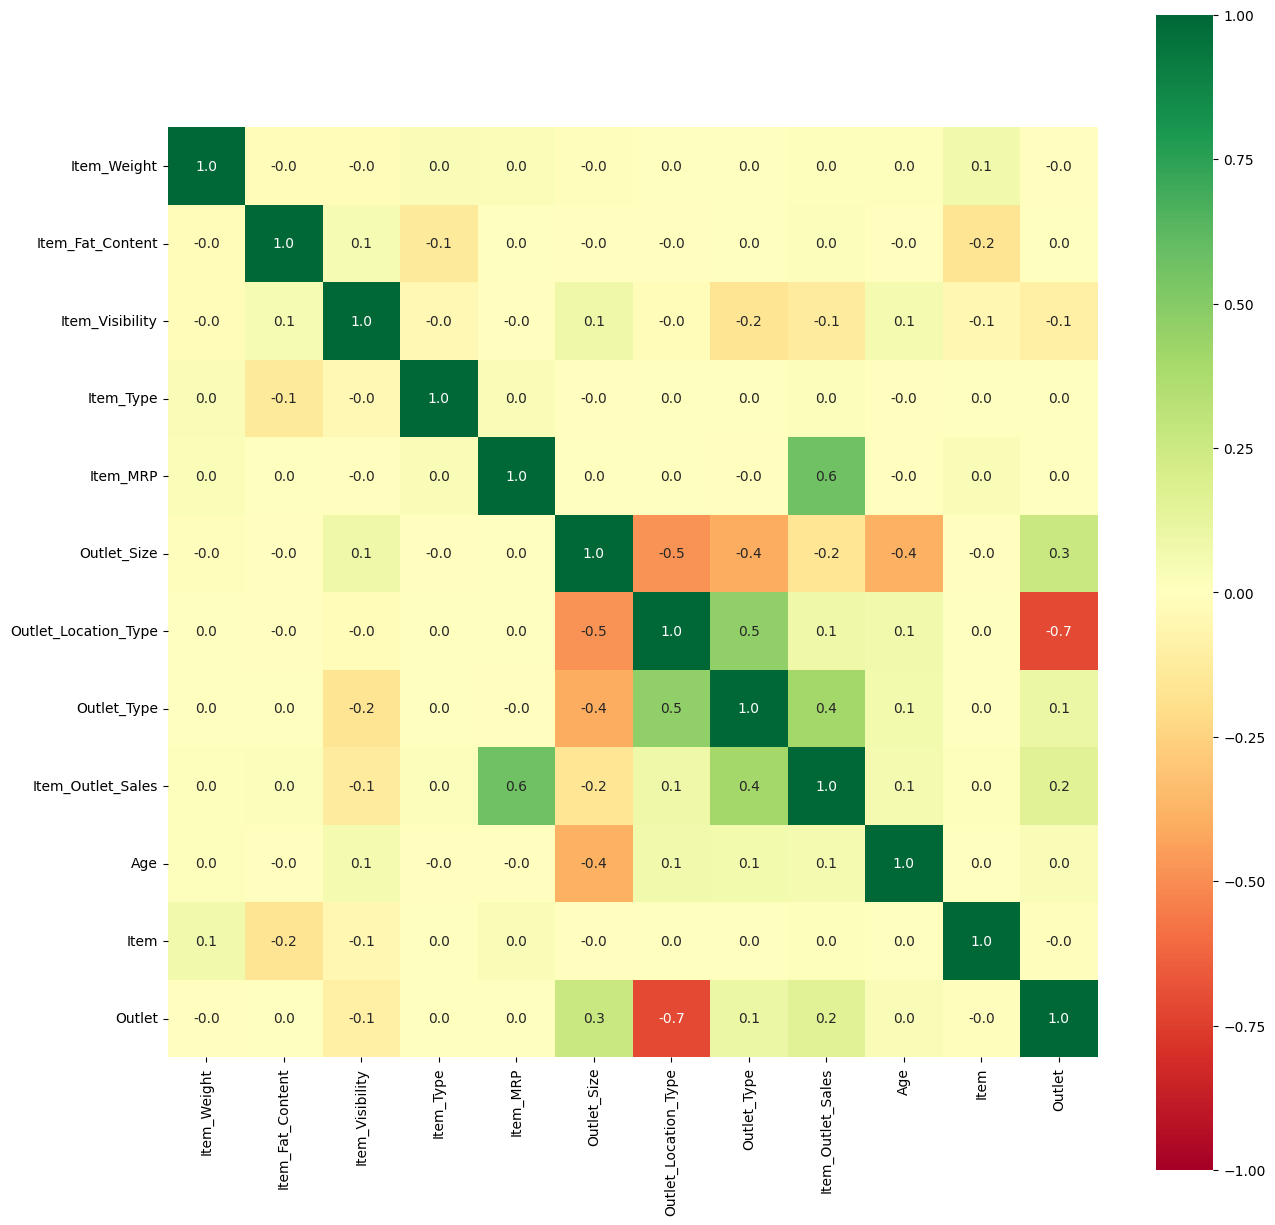

In [63]:
plt.subplots(figsize=(15,15))
sns.heatmap(core ,cmap='RdYlGn' ,vmin=-1 , vmax=1, annot=True ,fmt='.1f', square=True)


## from heatmap we can see Outlet part of the heatmap is active
******

In [64]:
train.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age,Item,Outlet
0,FDA15,9.300,0,0.016047,4,249.8092,OUT049,1,0,1,3735.1380,20,1,9
1,DRC01,5.920,1,0.019278,14,48.2692,OUT018,1,2,2,443.4228,10,0,3
2,FDN15,17.500,0,0.016760,10,141.6180,OUT049,1,0,1,2097.2700,20,1,9
3,FDX07,19.200,1,0.022911,6,182.0950,OUT010,2,2,0,732.3800,20,1,0
4,NCD19,8.930,0,0.016164,9,53.8614,OUT013,0,2,1,994.7052,30,2,1
5,FDP36,10.395,1,0.091392,0,51.4008,OUT018,1,2,2,556.6088,10,1,3
6,FDO10,13.650,1,0.012741,13,57.6588,OUT013,0,2,1,343.5528,30,1,1
7,FDP10,19.000,0,0.127470,13,107.7622,OUT027,1,2,3,4022.7636,30,1,5
8,FDH17,16.200,1,0.016687,5,96.9726,OUT045,2,1,1,1076.5986,20,1,7
9,FDU28,19.200,1,0.094450,5,187.8214,OUT017,2,1,1,4710.5350,10,1,2


***
## Getting features for PCA

In [65]:
features=[]
#features=train.columns
for i in train.columns:
        features.append(i)

features.remove('Item_Identifier')
features.remove('Outlet_Identifier')
features.remove('Item_Outlet_Sales')


features

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Age',
 'Item',
 'Outlet']

### standardizing

In [66]:
temp=[]
temp=train.loc[:,features]

temp=StandardScaler().fit_transform(temp)
#temp = temp.apply(lambda x: StandardScaler().fit_transform(temp))

temp

array([[-0.76976686, -0.73797948, -1.08708186, ..., -0.08950898,
        -0.17947351,  1.50736446],
       [-1.49727572,  1.35505123, -1.02285426, ..., -1.51179996,
        -2.09498209, -0.60702545],
       [ 0.99519547, -0.73797948, -1.07291257, ..., -0.08950898,
        -0.17947351,  1.50736446],
       ...,
       [-0.48995575, -0.73797948, -0.70661688, ..., -0.08950898,
         1.73603508,  0.45016951],
       [-1.21961701,  1.35505123,  1.48076443, ..., -1.51179996,
        -0.17947351, -0.60702545],
       [ 0.41404934, -0.73797948, -0.51394874, ..., -0.08950898,
        -2.09498209,  1.15496614]])

### using PCA

In [67]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

prin_comp=pca.fit_transform(temp)

principalDf=pd.DataFrame(data=prin_comp,columns=['Principal component 1','Principal component 2'])

principalDf

,Principal component 1,Principal component 2
0,-1.174495,-1.598581
1,1.355111,0.708871
2,-1.143131,-2.012289
3,0.415564,1.718476
4,2.572463,-0.734694
...,...,...
8512,2.491004,-0.188677
8513,-0.948875,0.531164
8514,-0.732682,-0.855978
8515,1.220636,1.392586


****
### now grouping PCA with some other atrributes to see relation

In [68]:
graph = pd.concat([principalDf,
                   pd.DataFrame(train['Item'].tolist()), 
                   pd.DataFrame(train['Item_Type'].tolist()), 
                   pd.DataFrame(train['Outlet_Type'].tolist()),
                   pd.DataFrame(train['Outlet_Size'].tolist()),
                   pd.DataFrame(train['Outlet'].tolist()),
                   pd.DataFrame(train['Outlet_Location_Type'].tolist()),
                   pd.DataFrame(train['Item_MRP'].tolist()),
                   pd.DataFrame(train['Age'].tolist()),
                   pd.DataFrame(train['Item_Fat_Content'].tolist()),
                   pd.DataFrame(train['Item_Visibility'].tolist()),
                   pd.DataFrame(train['Item_Weight'].tolist())
                  ] , axis=1)
graph.columns=['Principal component 1' , 'Principal component 2' , 'Item' , 'Item_Type',
               'Outlet_Type','Outlet_Size','Outlet','Outlet_Location_Type','Item_MRP','Age','Item_Fat_Content',
               'Item_Visibility','Item_Weight']

graph

,Principal component 1,Principal component 2,Item,Item_Type,Outlet_Type,Outlet_Size,Outlet,Outlet_Location_Type,Item_MRP,Age,Item_Fat_Content,Item_Visibility,Item_Weight
0,-1.174495,-1.598581,1,4,1,1,9,0,249.8092,20,0,0.016047,9.300
1,1.355111,0.708871,0,14,2,1,3,2,48.2692,10,1,0.019278,5.920
2,-1.143131,-2.012289,1,10,1,1,9,0,141.6180,20,0,0.016760,17.500
3,0.415564,1.718476,1,6,0,2,0,2,182.0950,20,1,0.022911,19.200
4,2.572463,-0.734694,2,9,1,0,1,2,53.8614,30,0,0.016164,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8512,2.491004,-0.188677,1,13,1,0,1,2,214.5218,30,0,0.056783,6.865
8513,-0.948875,0.531164,1,0,1,2,7,1,108.1570,20,1,0.046982,8.380
8514,-0.732682,-0.855978,2,8,1,2,6,1,85.1224,20,0,0.035186,10.600
8515,1.220636,1.392586,1,13,2,1,3,2,103.1332,10,1,0.145221,7.210


****
### grouping data

In [69]:
for i in range(len(graph.Item_Visibility)):
    if graph.Item_Visibility[i]<0.1:
        graph.Item_Visibility[i]=0.1
    elif graph.Item_Visibility[i]<0.2:
        graph.Item_Visibility[i]=0.2
    elif graph.Item_Visibility[i]<0.3:
        graph.Item_Visibility[i]=0.3
    elif graph.Item_Visibility[i]<0.4:
        graph.Item_Visibility[i]=0.4

graph.Item_Visibility

0       0.1
1       0.1
2       0.1
3       0.1
4       0.1
       ... 
8512    0.1
8513    0.1
8514    0.1
8515    0.2
8516    0.1
Name: Item_Visibility, Length: 8517, dtype: float64

In [70]:
for i in range(len(graph.Item_Weight)):
    if graph.Item_Weight[i]<5:
        graph.Item_Weight[i]=5
    elif graph.Item_Weight[i]<10:
        graph.Item_Weight[i]=10
    elif graph.Item_Weight[i]<15:
        graph.Item_Weight[i]=15
    elif graph.Item_Weight[i]<20:
        graph.Item_Weight[i]=20
    elif graph.Item_Weight[i]<25:
        graph.Item_Weight[i]=25

graph.Item_Weight

0       10.0
1       10.0
2       20.0
3       20.0
4       10.0
        ... 
8512    10.0
8513    10.0
8514    15.0
8515    10.0
8516    15.0
Name: Item_Weight, Length: 8517, dtype: float64

In [71]:
bins=[30,95,145,185,270]
labels=[95,145,185,270]
graph['Item_MRP']=pd.cut(x=graph['Item_MRP'],bins=bins,labels=labels,include_lowest = True)

graph.Item_MRP

0       270
1        95
2       145
3       185
4        95
       ... 
8512    270
8513    145
8514     95
8515    145
8516     95
Name: Item_MRP, Length: 8517, dtype: category
Categories (4, int64): [95 < 145 < 185 < 270]

In [72]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age,Item,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1,0,1,3735.1380,20,1,9
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,1,2,2,443.4228,10,0,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1,0,1,2097.2700,20,1,9
3,FDX07,19.20,1,0.022911,6,182.0950,OUT010,2,2,0,732.3800,20,1,0
4,NCD19,8.93,0,0.016164,9,53.8614,OUT013,0,2,1,994.7052,30,2,1


In [73]:
print((label_mapping))


[{0: 'Low Fat', 1: 'Regular'}, {0: 'Baking Goods', 1: 'Breads', 2: 'Breakfast', 3: 'Canned', 4: 'Dairy', 5: 'Frozen Foods', 6: 'Fruits and Vegetables', 7: 'Hard Drinks', 8: 'Health and Hygiene', 9: 'Household', 10: 'Meat', 11: 'Others', 12: 'Seafood', 13: 'Snack Foods', 14: 'Soft Drinks', 15: 'Starchy Foods'}, {0: 'High', 1: 'Medium', 2: 'Small'}, {0: 'Tier 1', 1: 'Tier 2', 2: 'Tier 3'}, {0: 'Grocery Store', 1: 'Supermarket Type1', 2: 'Supermarket Type2', 3: 'Supermarket Type3'}, {0: 'Drinks', 1: 'Food', 2: 'Non-Consumable'}, {0: 'OUT010', 1: 'OUT013', 2: 'OUT017', 3: 'OUT018', 4: 'OUT019', 5: 'OUT027', 6: 'OUT035', 7: 'OUT045', 8: 'OUT046', 9: 'OUT049'}]


Text(0.5, 1.0, 'Item')

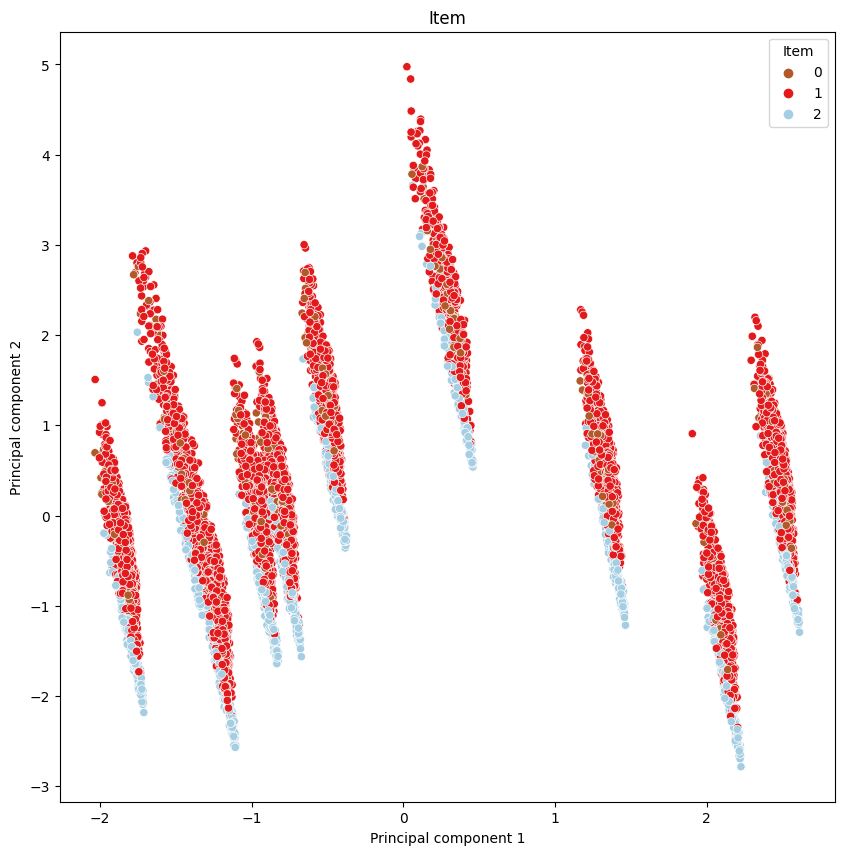

In [74]:
#now for visualizing the PCA 

plt.subplots(figsize=(10,10))
sns.scatterplot(data=graph,x='Principal component 1',y='Principal component 2',hue=graph.columns[2],palette='Paired_r').set_title(graph.columns[2])


#### no patterns
***

Text(0.5, 1.0, 'Item_Type')

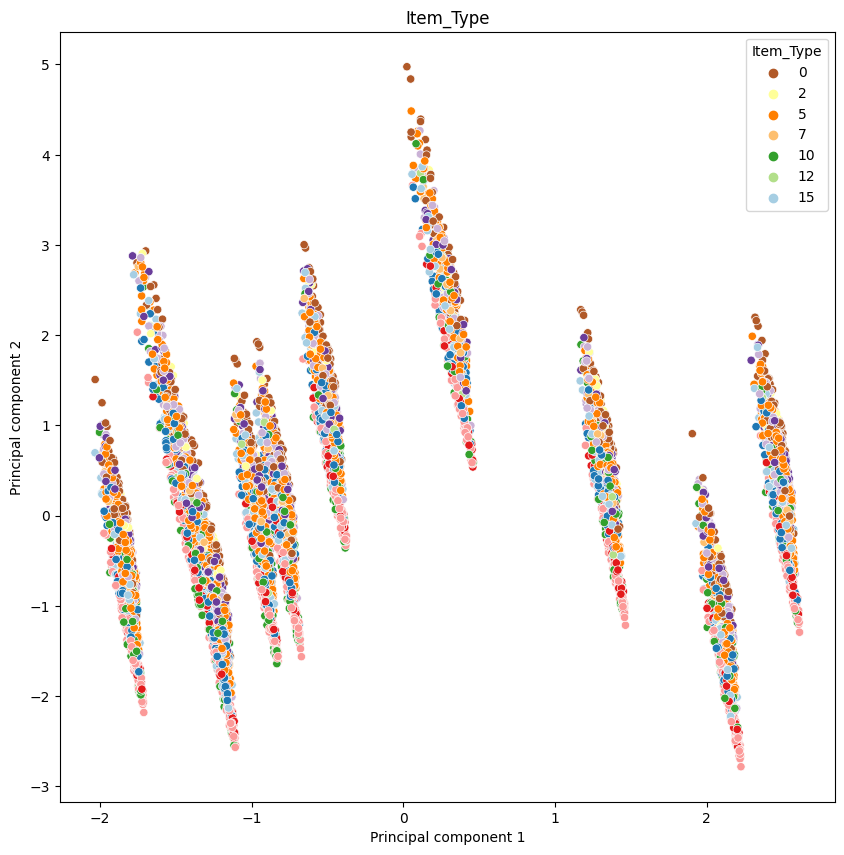

In [75]:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=graph,x='Principal component 1',y='Principal component 2',hue=graph.columns[3],palette='Paired_r').set_title(graph.columns[3])


#### no patterns
***

Text(0.5, 1.0, 'Outlet_Type')

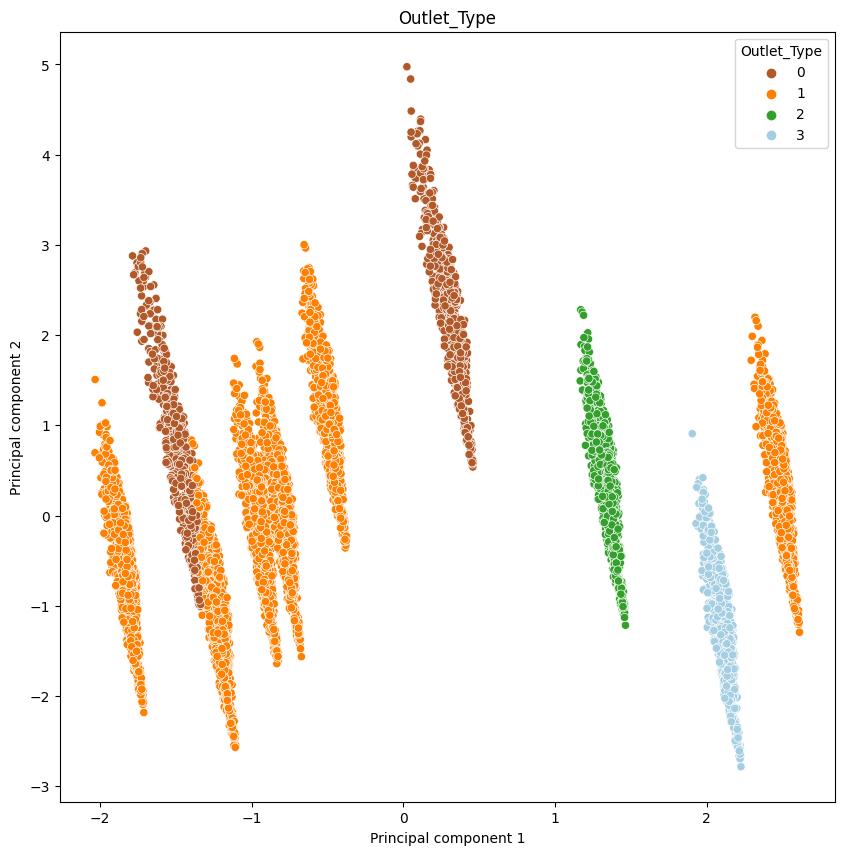

In [76]:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=graph,x='Principal component 1',y='Principal component 2',hue=graph.columns[4],palette='Paired_r').set_title(graph.columns[4])


#### patterns found
***

Text(0.5, 1.0, 'Outlet_Size')

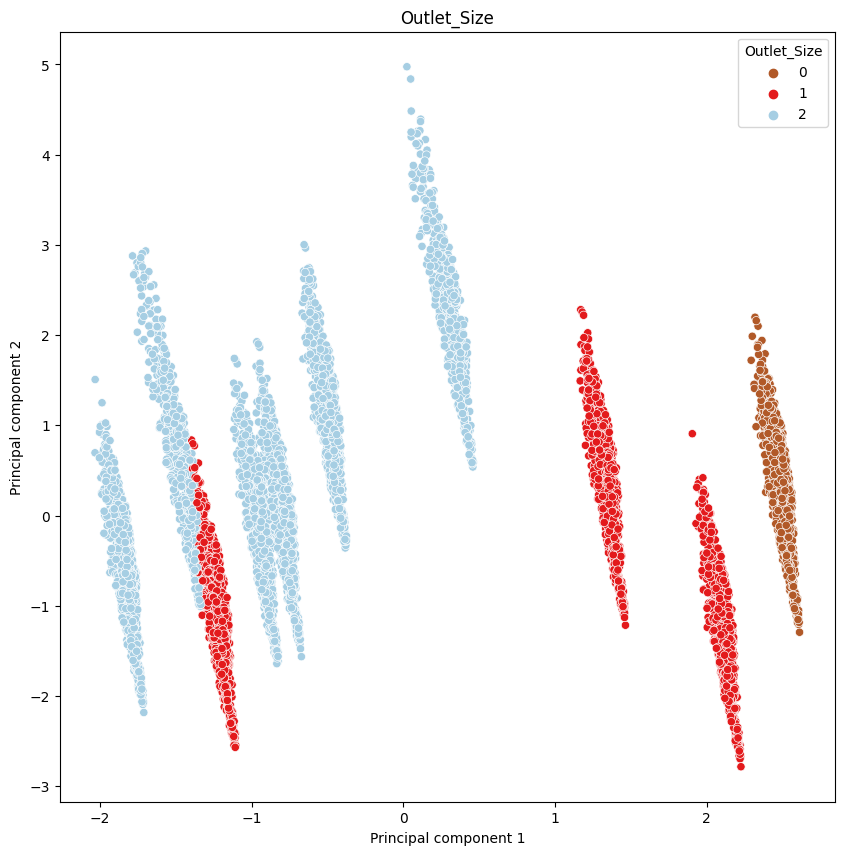

In [77]:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=graph,x='Principal component 1',y='Principal component 2',hue=graph.columns[5],palette='Paired_r').set_title(graph.columns[5])


#### patterns found
***

Text(0.5, 1.0, 'Outlet')

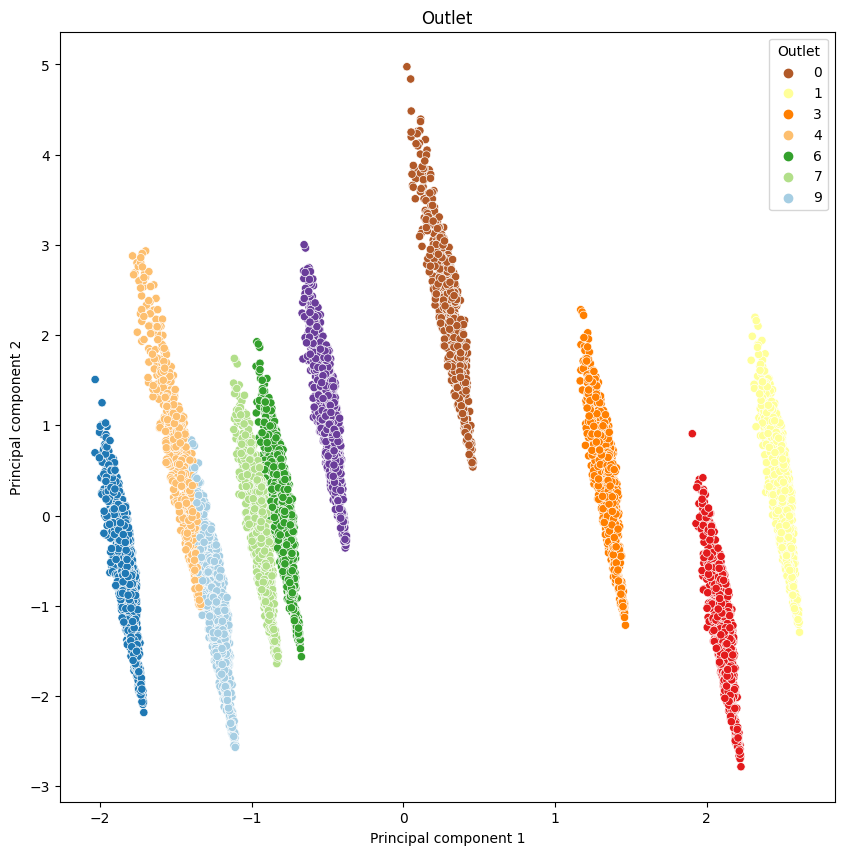

In [78]:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=graph,x='Principal component 1',y='Principal component 2',hue=graph.columns[6],palette='Paired_r').set_title(graph.columns[6])


#### patterns found
****

Text(0.5, 1.0, 'Outlet_Location_Type')

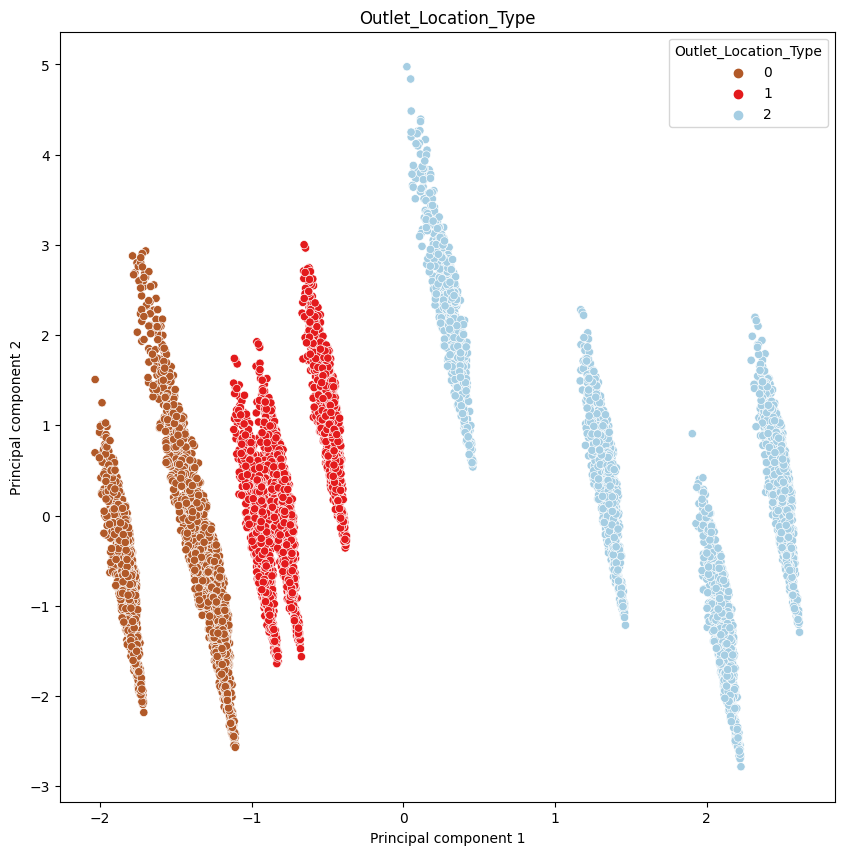

In [79]:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=graph,x='Principal component 1',y='Principal component 2',hue=graph.columns[7],palette='Paired_r').set_title(graph.columns[7])


#### patterns found
****

Text(0.5, 1.0, 'Item_MRP')

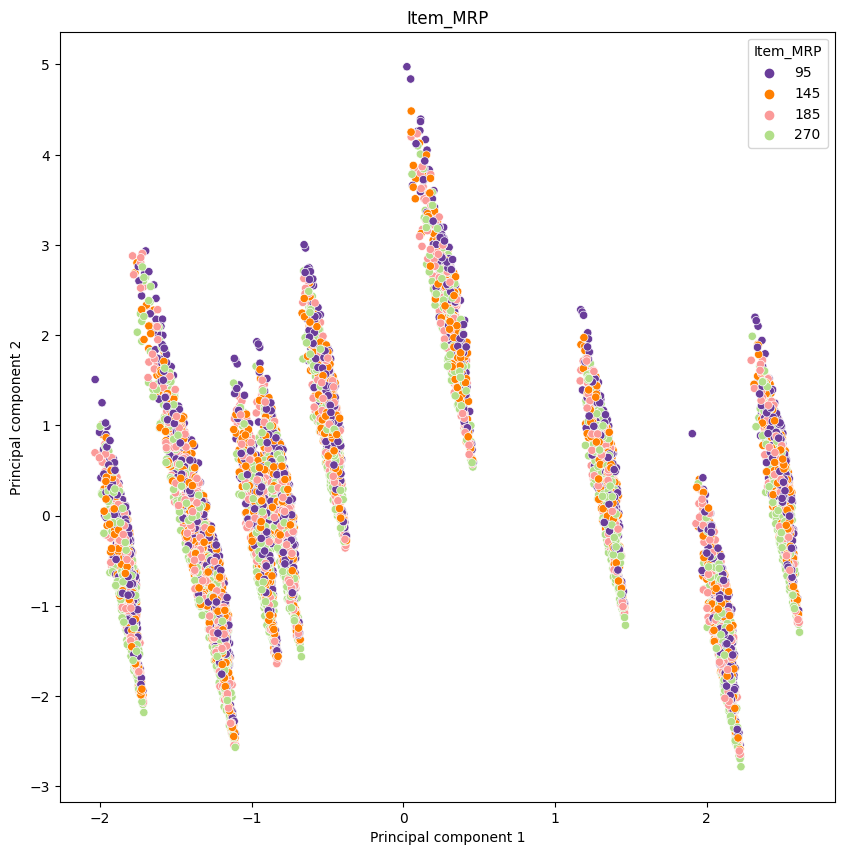

In [80]:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=graph,x='Principal component 1',y='Principal component 2',hue=graph.columns[8],palette='Paired_r').set_title(graph.columns[8])


#### no patterns found
****

Text(0.5, 1.0, 'Age')

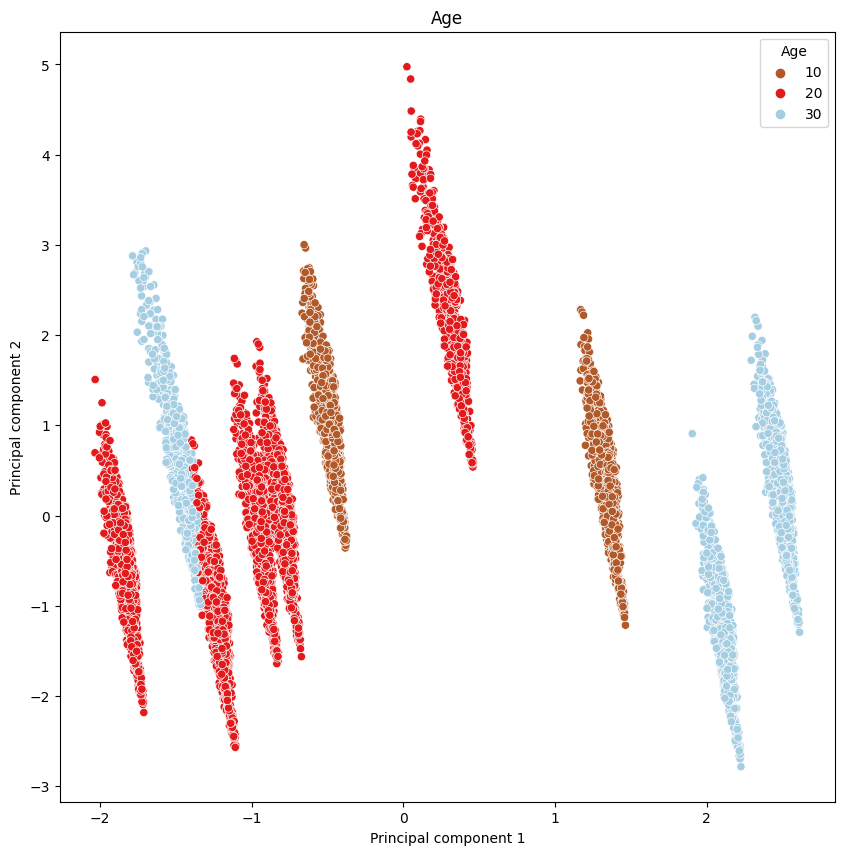

In [81]:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=graph,x='Principal component 1',y='Principal component 2',hue=graph.columns[9],palette='Paired_r').set_title(graph.columns[9])


#### no patterns
****

Text(0.5, 1.0, 'Item_Fat_Content')

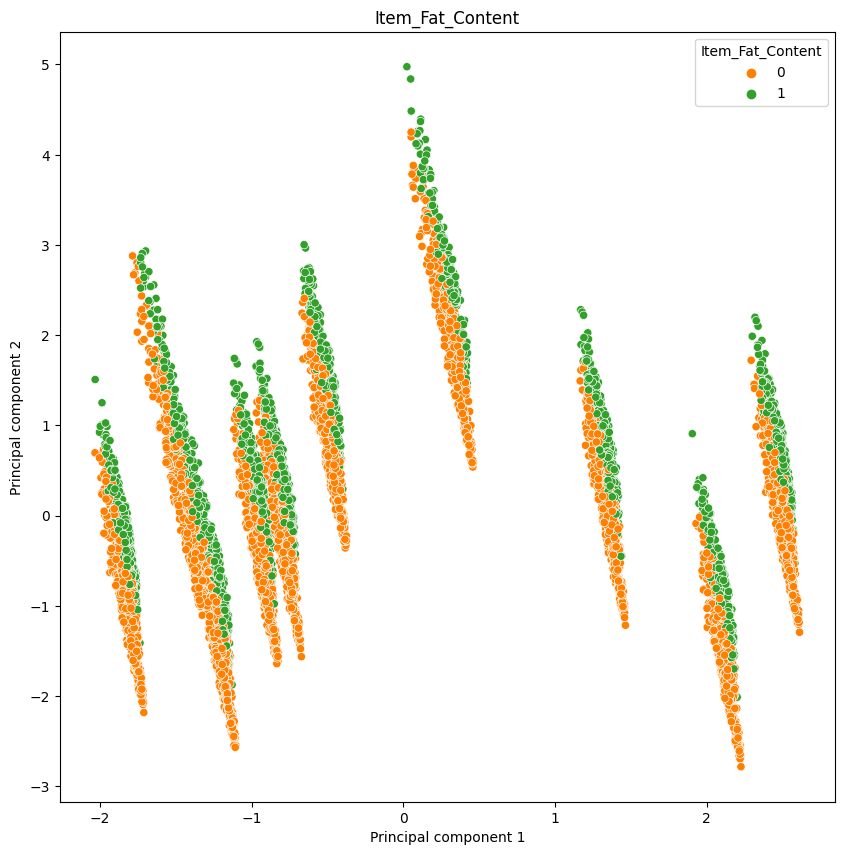

In [82]:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=graph,x='Principal component 1',y='Principal component 2',hue=graph.columns[10],palette='Paired_r').set_title(graph.columns[10])


#### no patterns
***

Text(0.5, 1.0, 'Item_Visibility')

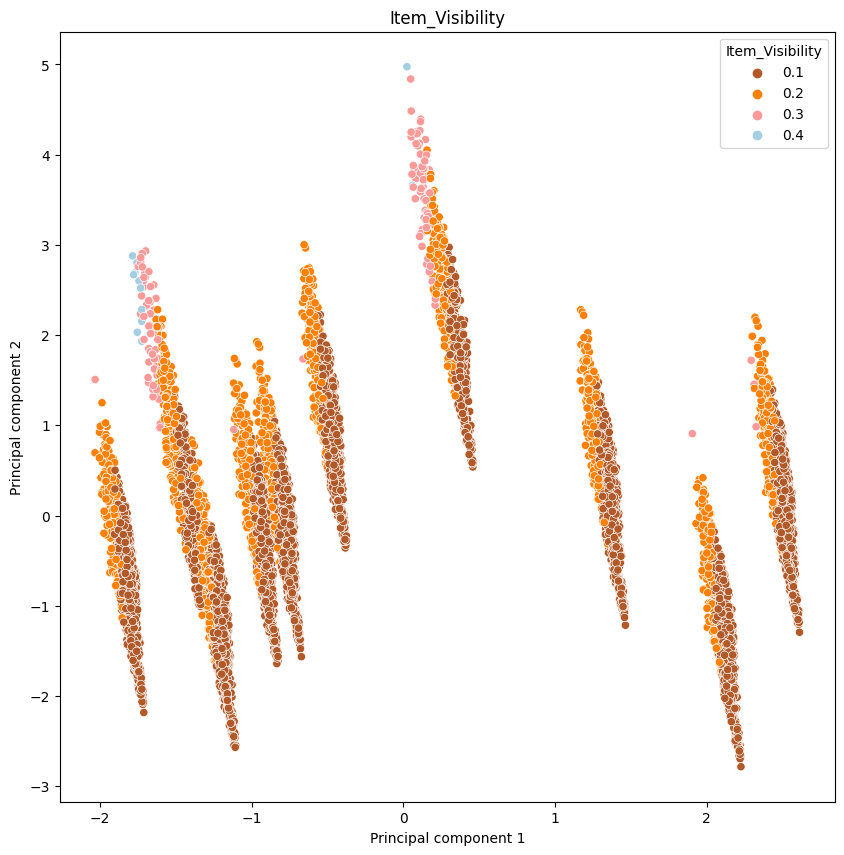

In [83]:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=graph,x='Principal component 1',y='Principal component 2',hue=graph.columns[11],palette='Paired_r').set_title(graph.columns[11])

#### No patterns

Text(0.5, 1.0, 'Item_Weight')

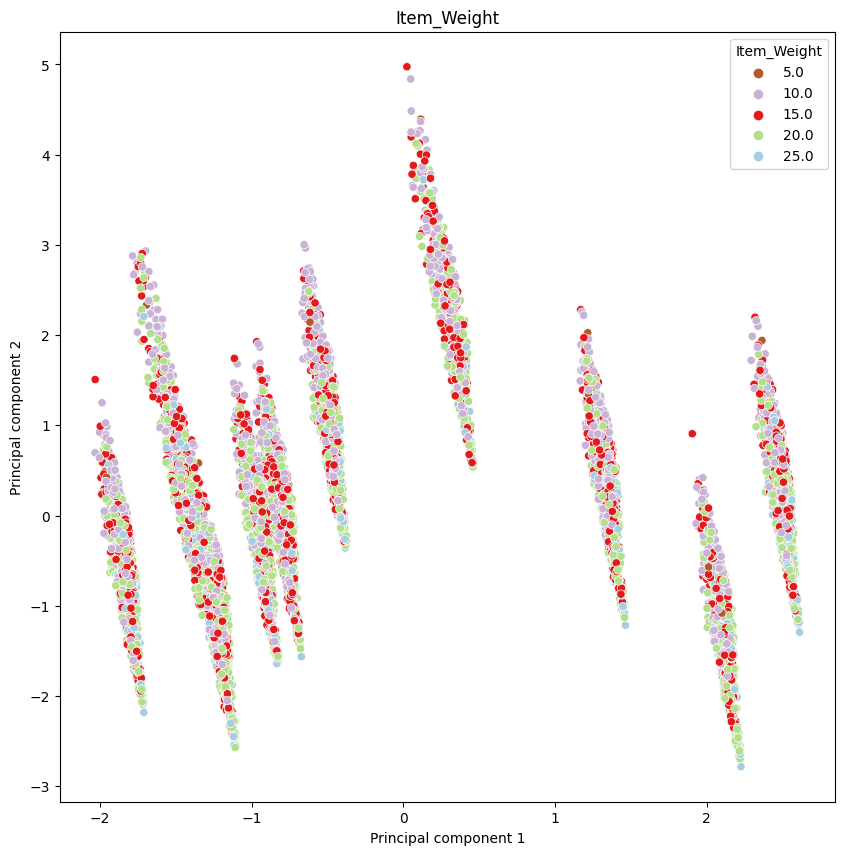

In [84]:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=graph,x='Principal component 1',y='Principal component 2',hue=graph.columns[12],palette='Paired_r').set_title(graph.columns[12])

#### No patterns


# Predictive Modelling
## now choosing predictors for the model

In [85]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age,Item,Outlet
0,FDA15,9.300,0,0.016047,4,249.8092,OUT049,1,0,1,3735.1380,20,1,9
1,DRC01,5.920,1,0.019278,14,48.2692,OUT018,1,2,2,443.4228,10,0,3
2,FDN15,17.500,0,0.016760,10,141.6180,OUT049,1,0,1,2097.2700,20,1,9
3,FDX07,19.200,1,0.022911,6,182.0950,OUT010,2,2,0,732.3800,20,1,0
4,NCD19,8.930,0,0.016164,9,53.8614,OUT013,0,2,1,994.7052,30,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,13,214.5218,OUT013,0,2,1,2778.3834,30,1,1
8519,FDS36,8.380,1,0.046982,0,108.1570,OUT045,2,1,1,549.2850,20,1,7
8520,NCJ29,10.600,0,0.035186,8,85.1224,OUT035,2,1,1,1193.1136,20,2,6
8521,FDN46,7.210,1,0.145221,13,103.1332,OUT018,1,2,2,1845.5976,10,1,3


In [86]:
predictors=['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP',
            'Outlet_Size','Outlet_Location_Type','Outlet_Type',
            'Age','Outlet','Item','Item_Weight']


x = train[predictors]
y = train.Item_Outlet_Sales
x.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,Outlet,Item,Item_Weight
0,0,0.016047,4,249.8092,1,0,1,20,9,1,9.30
1,1,0.019278,14,48.2692,1,2,2,10,3,0,5.92
2,0,0.016760,10,141.6180,1,0,1,20,9,1,17.50
3,1,0.022911,6,182.0950,2,2,0,20,0,1,19.20
4,0,0.016164,9,53.8614,0,2,1,30,1,2,8.93


In [87]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

### Splitting Test and Train

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

### Checking if Test and Train shapes

In [89]:
x_train.shape

(6387, 11)

In [90]:
x_test.shape

(2130, 11)

In [91]:
y_train.shape

(6387,)

In [92]:
y_test.shape

(2130,)

### apllying linear regression model

In [93]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)
predictions = lm.predict(x_test)

### Plotting

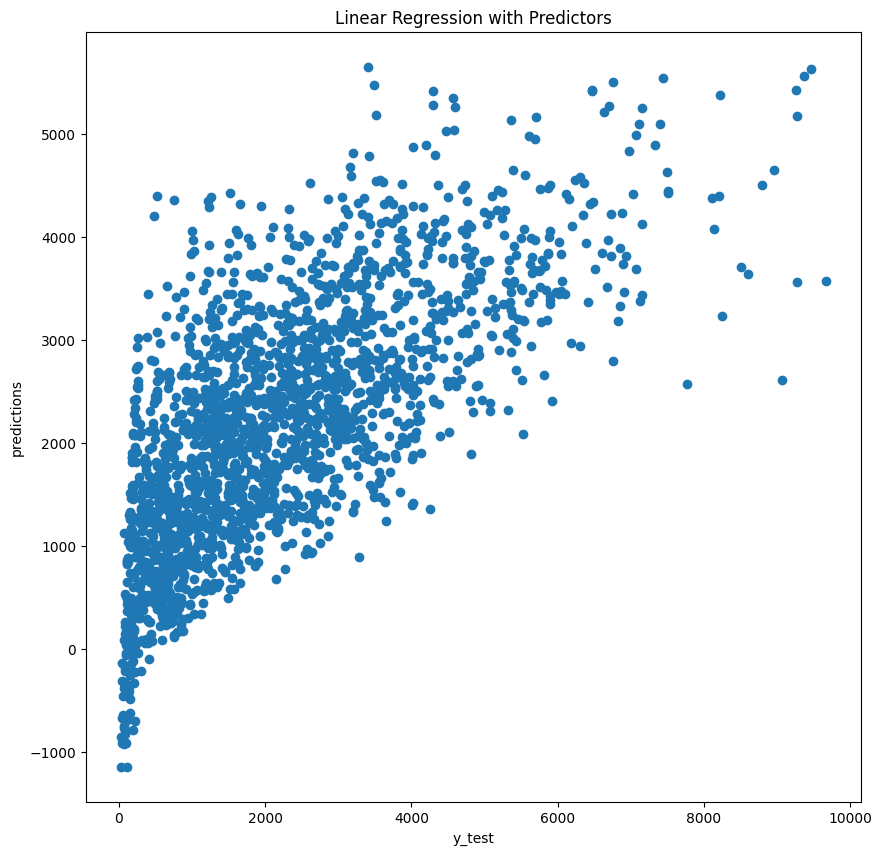

In [94]:
plt.subplots(figsize=(10,10))

plt.scatter(y_test,predictions)
plt.title('Linear Regression with Predictors')
plt.xlabel("y_test")
plt.ylabel("predictions")

plt.show()

### Checking scores

In [95]:
#R^2 Score
print("Linear Regression Model Score:",model.score(x_test,y_test))

Linear Regression Model Score: 0.5045493272541646


In [96]:
original_values = y_test
#Root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(original_values,predictions))
print("Linear Regression RMSE: ", rmse)

Linear Regression RMSE:  1193.6789074106941


***********
### Now same but with Principal components

In [97]:
x=principalDf
y = train.Item_Outlet_Sales
x.head()

,Principal component 1,Principal component 2
0,-1.174495,-1.598581
1,1.355111,0.708871
2,-1.143131,-2.012289
3,0.415564,1.718476
4,2.572463,-0.734694


In [98]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

### splitting

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

### Checking shape

In [100]:
x_train.shape

(6387, 2)

In [101]:
x_test.shape

(2130, 2)

In [102]:
y_train.shape

(6387,)

In [103]:
y_test.shape

(2130,)

### applying model

In [104]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)
predictions = lm.predict(x_test)

### Plotting

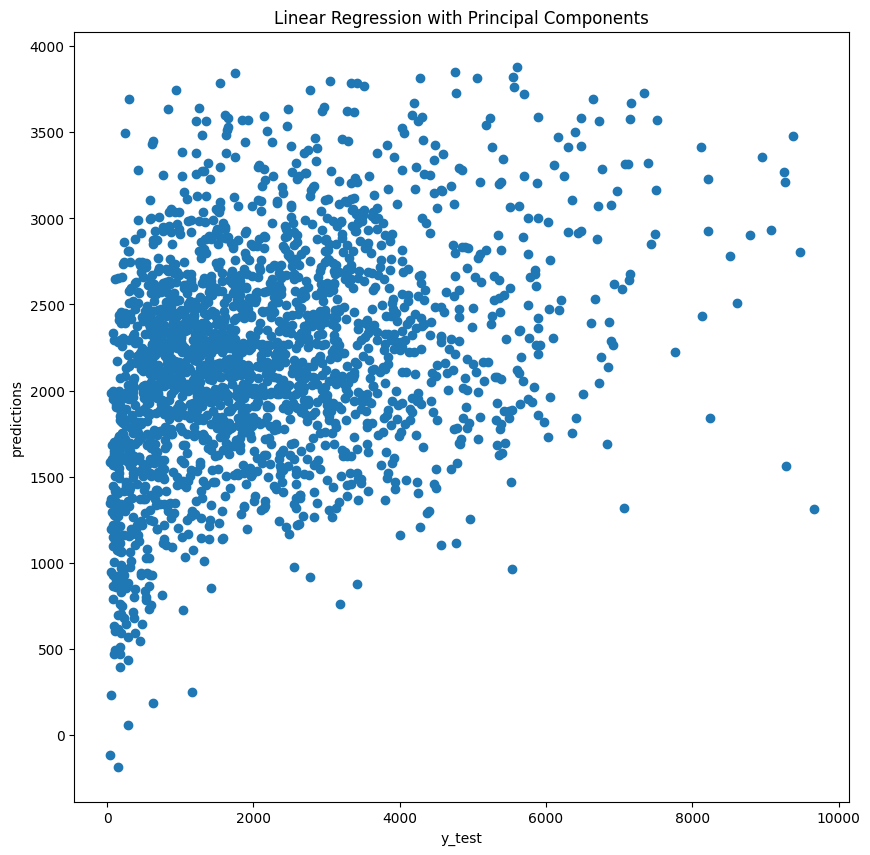

In [105]:
plt.subplots(figsize=(10,10))

plt.scatter(y_test,predictions)
plt.title('Linear Regression with Principal Components')
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.show()

### checking scores

In [106]:
#R^2 Score
print("Linear Regression Model Score:",model.score(x_test,y_test))

Linear Regression Model Score: 0.12239870155395982


In [107]:
original_values = y_test
#Root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(original_values,predictions))
print("Linear Regression RMSE: ", rmse)

Linear Regression RMSE:  1588.6782037716757


*********
### Trying to fit in Decision Trees

In [108]:
predictors=['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP',
            'Outlet_Size','Outlet_Location_Type','Outlet_Type',
            'Age','Outlet','Item','Item_Weight']

x = train[predictors]
y = train.Item_Outlet_Sales
x.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,Outlet,Item,Item_Weight
0,0,0.016047,4,249.8092,1,0,1,20,9,1,9.30
1,1,0.019278,14,48.2692,1,2,2,10,3,0,5.92
2,0,0.016760,10,141.6180,1,0,1,20,9,1,17.50
3,1,0.022911,6,182.0950,2,2,0,20,0,1,19.20
4,0,0.016164,9,53.8614,0,2,1,30,1,2,8.93


In [109]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [110]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [111]:
x_train.shape

(6387, 11)

In [112]:
y_train.shape

(6387,)

In [113]:
x_test.shape

(2130, 11)

In [114]:
y_test.shape

(2130,)

### Applying model

In [115]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)
predictions=regressor.predict(x_test)

predictions[:10]

array([1966.7732, 3248.4382, 3121.2704, 5866.3638,  982.055 , 1504.708 ,
       4705.8744, 1320.9472, 1426.1436,  708.4112])

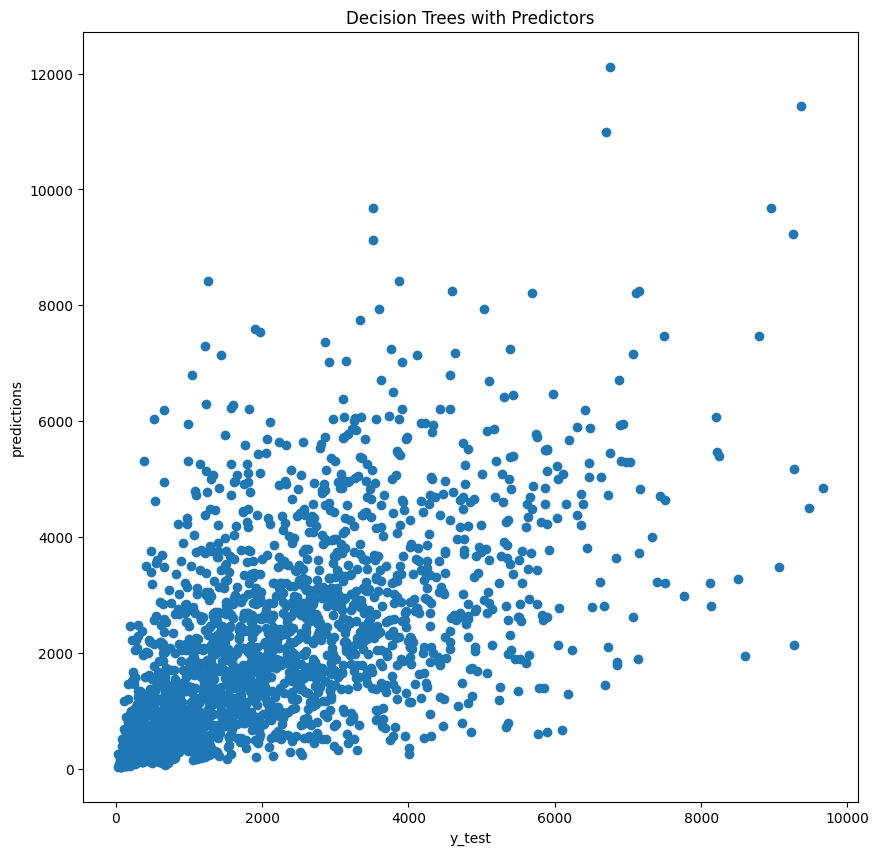

In [116]:
plt.subplots(figsize=(10,10))

plt.scatter(y_test,predictions)
plt.title('Decision Trees with Predictors')
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.show()

In [117]:
#R^2 Score
print("Decision Trees Regression Model Score:",regressor.score(x_test,y_test))

Decision Trees Regression Model Score: 0.18935899880871476


In [118]:
#Root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))
print("Decision Trees Regression RMSE: ", rmse)

Decision Trees Regression RMSE:  1526.868345790965


******
### Now same with Principle Components

In [119]:
x=principalDf
y = train.Item_Outlet_Sales
x.head()

,Principal component 1,Principal component 2
0,-1.174495,-1.598581
1,1.355111,0.708871
2,-1.143131,-2.012289
3,0.415564,1.718476
4,2.572463,-0.734694


In [120]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

### Checking shape

In [122]:
x_train.shape

(6387, 2)

In [123]:
y_train.shape

(6387,)

In [124]:
x_test.shape

(2130, 2)

In [125]:
y_test.shape

(2130,)

### Now applying model

In [126]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)
predictions=regressor.predict(x_test)

predictions[:10]

array([3415.554 , 1713.7692, 1468.089 , 3012.745 , 1435.4648, 1577.946 ,
       7094.7648,  559.272 , 4613.994 , 1438.128 ])

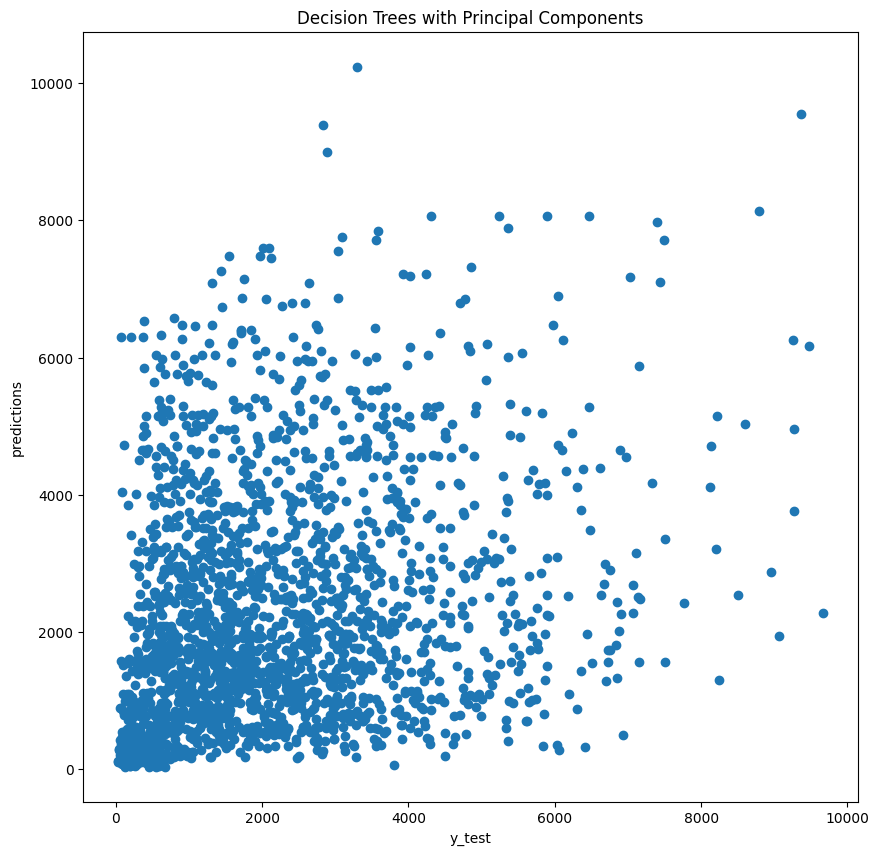

In [127]:
plt.subplots(figsize=(10,10))

plt.scatter(y_test,predictions)
plt.title('Decision Trees with Principal Components')
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.show()

In [128]:
#R^2 Score
print("Decision Trees Regression Model Score:",regressor.score(x_test,y_test))

Decision Trees Regression Model Score: -0.47003077669125926


In [129]:
#Root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))
print("Decision Trees Regression RMSE: ", rmse)

Decision Trees Regression RMSE:  2056.1297753369386


*****
### Trying to fit Adaboost with Selected Components

In [130]:
predictors=['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP',
            'Outlet_Size','Outlet_Location_Type','Outlet_Type',
            'Age','Outlet','Item','Item_Weight']

x = train[predictors]
y = train.Item_Outlet_Sales
x.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,Outlet,Item,Item_Weight
0,0,0.016047,4,249.8092,1,0,1,20,9,1,9.30
1,1,0.019278,14,48.2692,1,2,2,10,3,0,5.92
2,0,0.016760,10,141.6180,1,0,1,20,9,1,17.50
3,1,0.022911,6,182.0950,2,2,0,20,0,1,19.20
4,0,0.016164,9,53.8614,0,2,1,30,1,2,8.93


In [131]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [133]:
x_train.shape

(6387, 11)

In [134]:
y_train.shape

(6387,)

In [135]:
x_test.shape

(2130, 11)

In [136]:
y_test.shape

(2130,)

In [137]:
regressor=AdaBoostRegressor(DecisionTreeRegressor(max_depth=8),
                            n_estimators=300, random_state=42)
regressor.fit(x_train,y_train)
predictions=regressor.predict(x_test)

predictions[:10]

array([2220.80616364, 3644.81986682, 3883.49081622, 4659.40364062,
       2985.6632543 , 2143.876     , 5026.79      , 2356.87006512,
       1951.52032727, 1581.45254667])

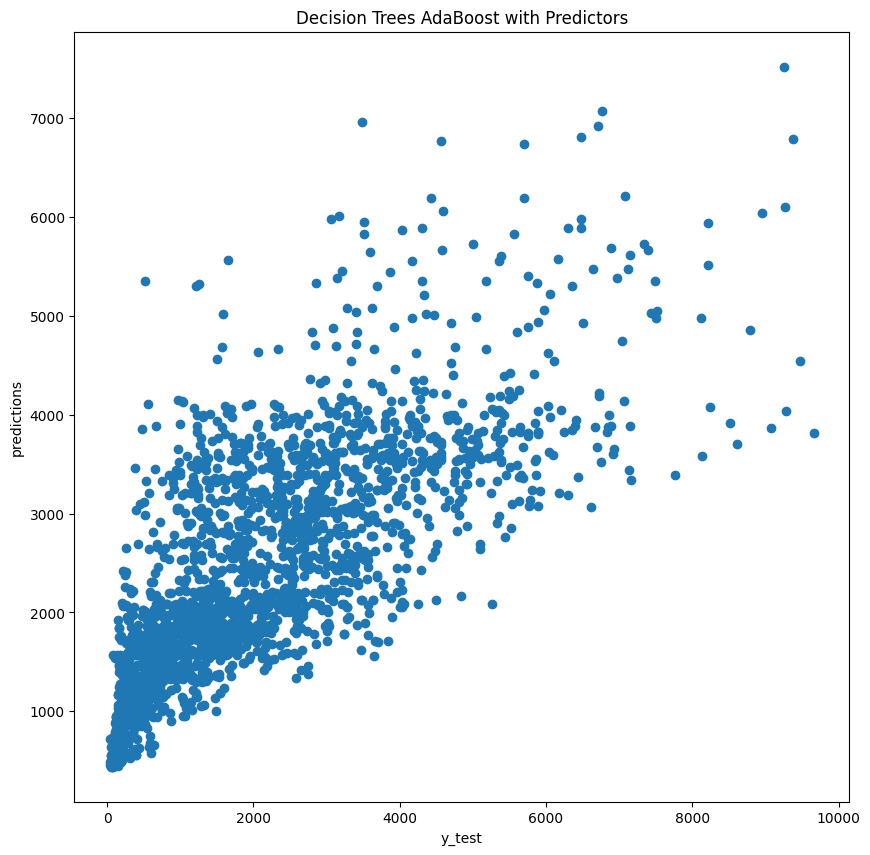

In [138]:
plt.subplots(figsize=(10,10))

plt.scatter(y_test,predictions)
plt.title('Decision Trees AdaBoost with Predictors')
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.show()

In [139]:
#R^2 Score
print("AdaBoost Decision Trees Regression Model Score:",regressor.score(x_test,y_test))

AdaBoost Decision Trees Regression Model Score: 0.5136091332907253


In [140]:
#Root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))
print("AdaBoost Decision Trees Regression RMSE: ", rmse)

AdaBoost Decision Trees Regression RMSE:  1182.7147532838856


*****
### Trying to fit AdaBoost with Principle Components

In [141]:
x=principalDf
y = train.Item_Outlet_Sales
x.head()

,Principal component 1,Principal component 2
0,-1.174495,-1.598581
1,1.355111,0.708871
2,-1.143131,-2.012289
3,0.415564,1.718476
4,2.572463,-0.734694


In [142]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [143]:
x_train.shape

(6387, 2)

In [144]:
y_train.shape

(6387,)

In [145]:
x_test.shape

(2130, 2)

In [146]:
y_test.shape

(2130,)

In [147]:
regressor=AdaBoostRegressor(DecisionTreeRegressor(max_depth=8),
                            n_estimators=300, random_state=42)
regressor.fit(x_train,y_train)
predictions=regressor.predict(x_test)

predictions[:10]

array([3588.06551349, 3451.13863214, 3750.02913371, 3647.58968026,
       3751.56180189, 3253.00668406, 4161.32212833, 3962.66576739,
       3941.05482762, 3480.19082495])

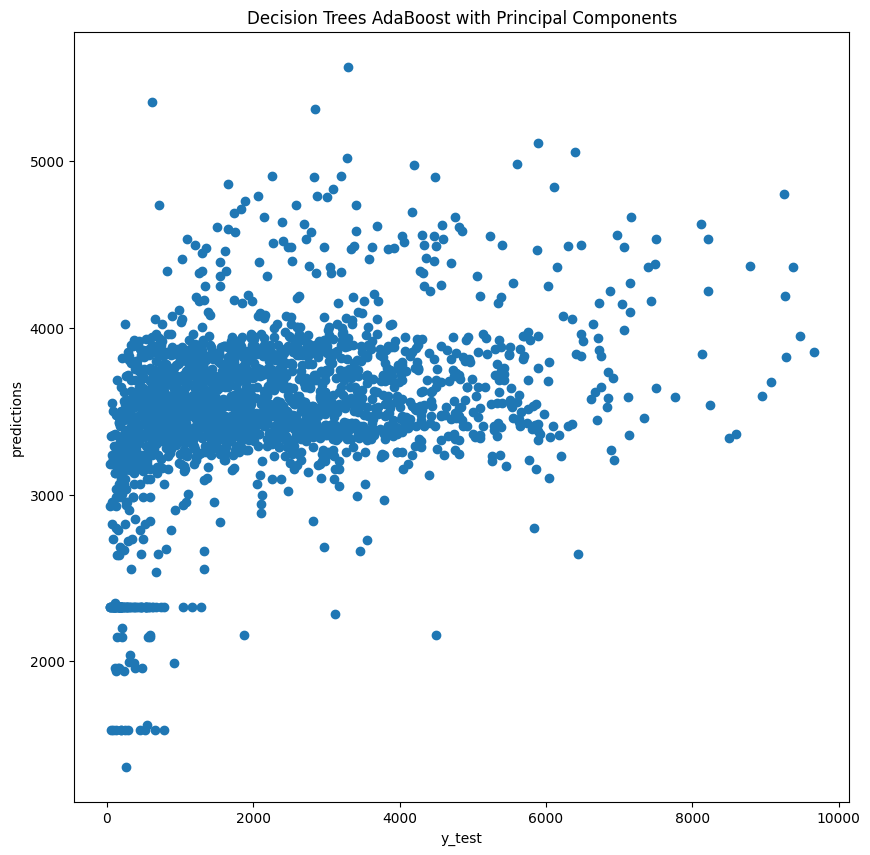

In [148]:
plt.subplots(figsize=(10,10))

plt.scatter(y_test,predictions)
plt.title('Decision Trees AdaBoost with Principal Components')
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.show()

In [149]:
#R^2 Score
print("AdaBoost Decision Trees Regression Model Score:",regressor.score(x_test,y_test))

AdaBoost Decision Trees Regression Model Score: -0.5034904220093352


In [150]:
#Root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))
print("AdaBoost Decision Trees Regression RMSE: ", rmse)

AdaBoost Decision Trees Regression RMSE:  2079.398093758558


In [151]:
from datetime import date
import holidays

In [152]:
in_holidays = holidays.IN()

In [153]:
print(holidays)

<module 'holidays' from 'C:\\Users\\Varun\\AppData\\Roaming\\Python\\Python311\\site-packages\\holidays\\__init__.py'>


In [154]:
holidays.IN()

holidays.country_holidays('IN')

In [155]:
for date, name in sorted(holidays.IN(subdiv='TN',years=2023).items()):
    print(date, name)

2023-01-14 Makar Sankranti / Pongal
2023-01-26 Republic Day
2023-03-08 Holi
2023-04-02 Palm Sunday
2023-04-07 Good Friday
2023-04-09 Easter Sunday
2023-04-14 Dr. B. R. Ambedkar's Jayanti; Puthandu (Tamil New Year)
2023-04-15 Puthandu (Tamil New Year)
2023-04-21 Eid ul-Fitr* (*estimated)
2023-04-22 Eid ul-Fitr* (*estimated)
2023-05-01 Labour Day
2023-05-28 Feast of Pentecost
2023-06-28 Eid al-Adha* (*estimated)
2023-06-29 Eid al-Adha* (*estimated)
2023-07-28 Day of Ashura* (*estimated)
2023-08-15 Independence Day
2023-09-27 Mawlid* (*estimated)
2023-10-02 Gandhi Jayanti
2023-11-12 Diwali
2023-12-25 Christmas Day
